In [62]:
import scanpy as sc
import matplotlib.pyplot as plt 
import pandas as pd 
from matplotlib import rcParams

In [2]:
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# PCA plot before filtering 


In [3]:
#PCA_analysis= sc.tl.pca(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


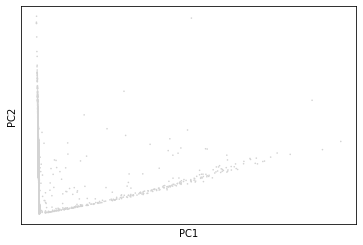

In [4]:
sc.tl.pca(adata)
sc.pl.pca(adata)

# PCA plot after filtering

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


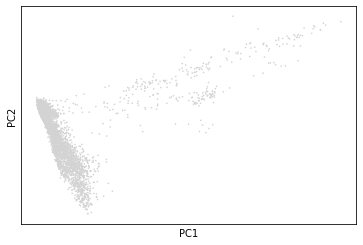

In [5]:
filtered= sc.pp.recipe_zheng17(adata, n_top_genes=1000, log=True, plot=False, copy=True)
sc.tl.pca(filtered)
sc.pl.pca(filtered)

# part 2 TSNE


/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


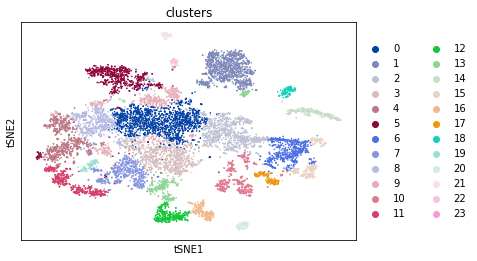

In [58]:
neighbor = sc.pp.neighbors(filtered, copy=True)
cluster= sc.tl.leiden(neighbor, key_added='clusters', copy=True)
sc.tl.tsne(cluster)
sc.pl.tsne(cluster, color='clusters')

# part 2 UMAP

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


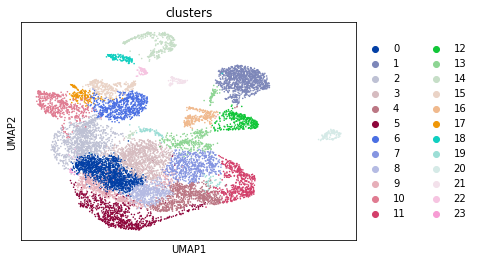

In [59]:
sc.tl.umap(cluster)
sc.pl.umap(cluster, color='clusters')

# part 3

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


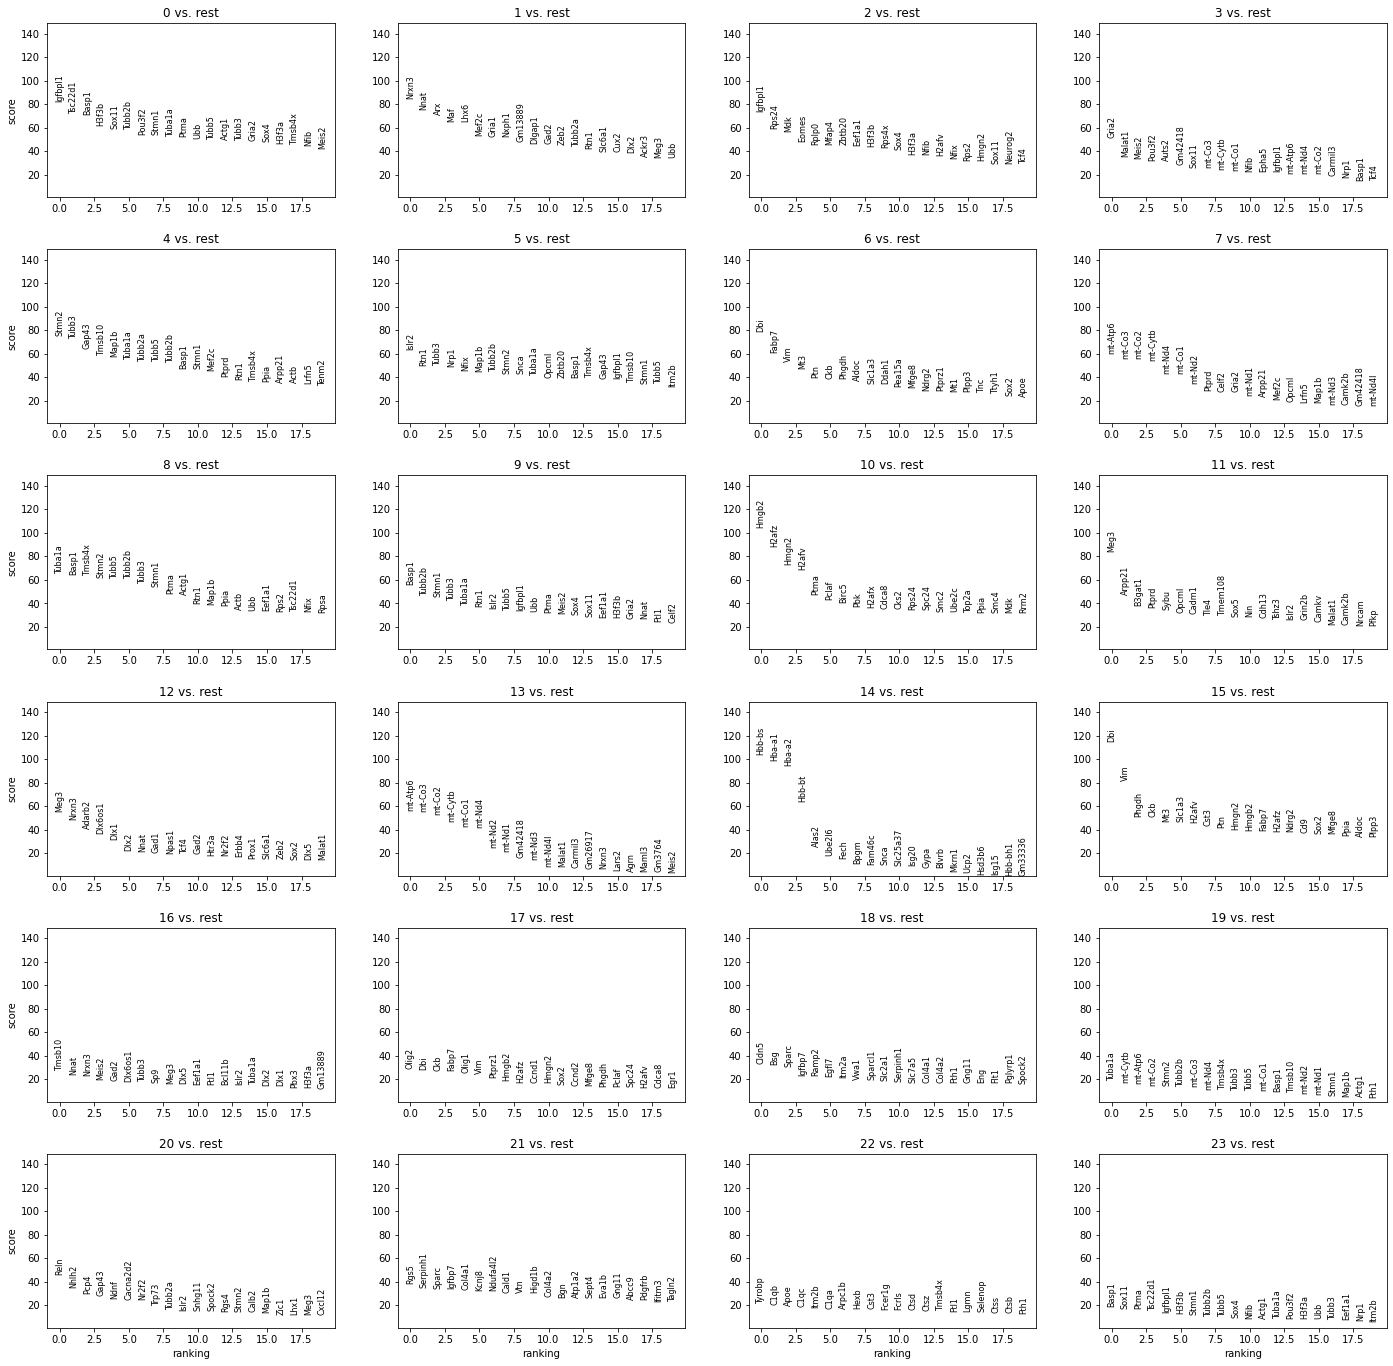

In [14]:
#t-test method 
ranked= sc.tl.rank_genes_groups(cluster, 'leiden', method='t-test', copy=True)
sc.pl.rank_genes_groups(ranked)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


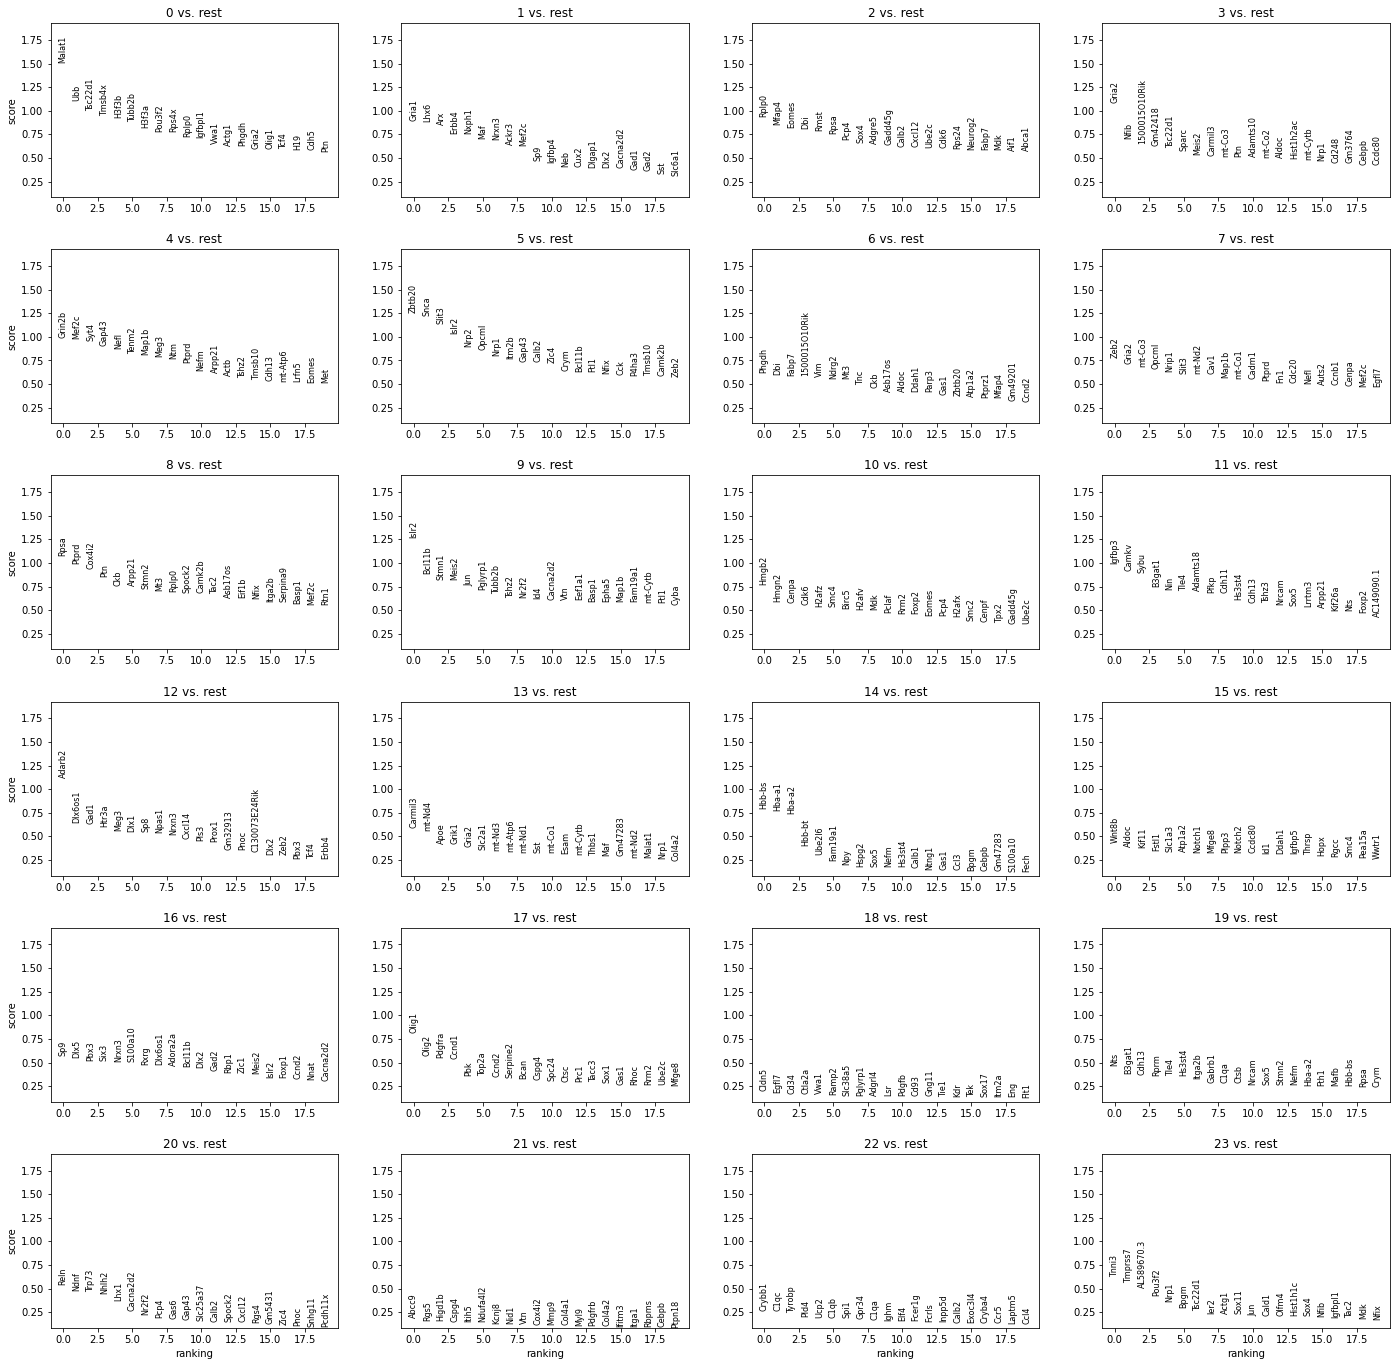

In [53]:
#log regression method 
ranked2= sc.tl.rank_genes_groups(cluster, 'leiden', method='logreg', copy=True)
sc.pl.rank_genes_groups(ranked2)

# part 4

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


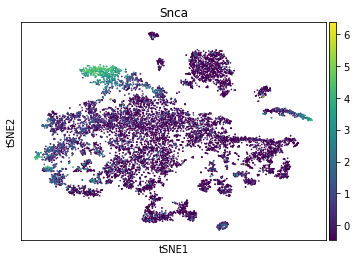

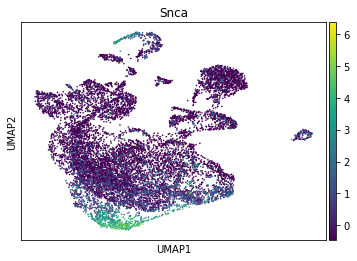

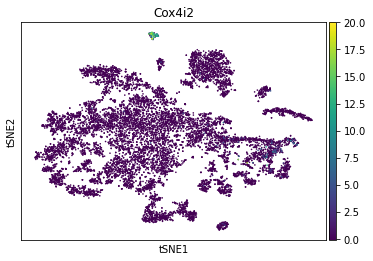

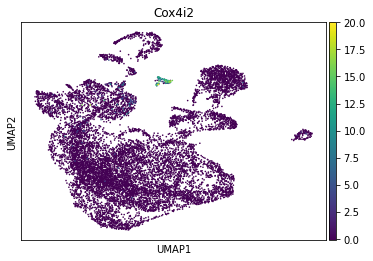

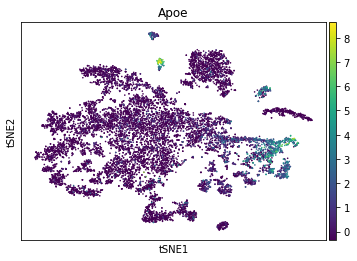

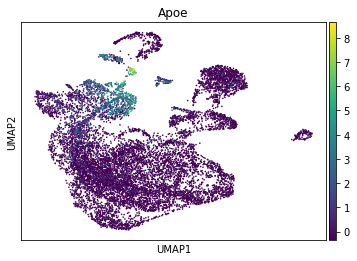

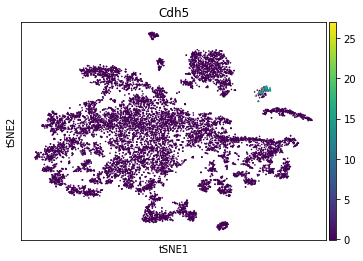

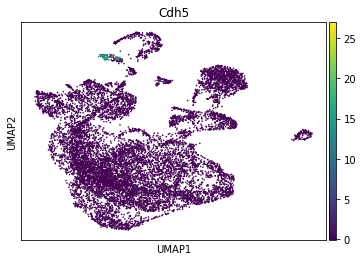

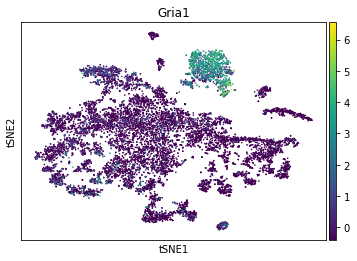

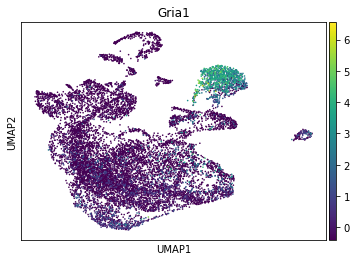

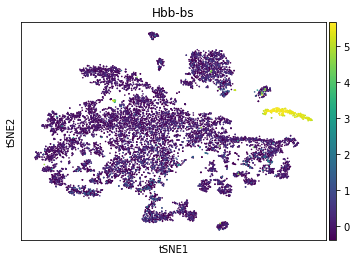

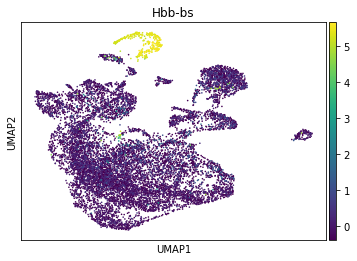

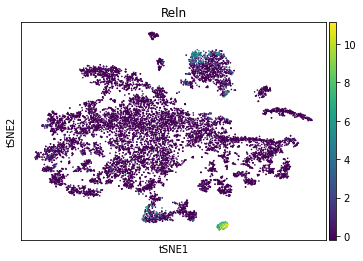

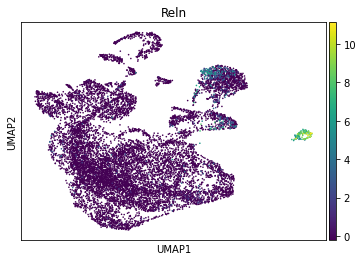

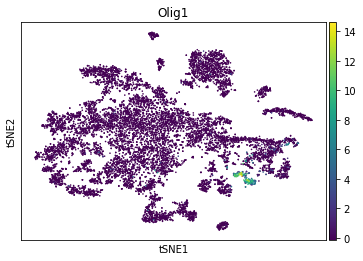

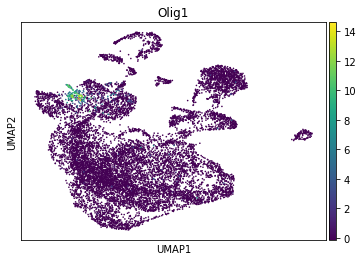

In [56]:

#neurons  = Snca 
sc.tl.tsne(cluster)
layer1=sc.pl.tsne(cluster, color='Snca')
sc.pl.umap(cluster, color='Snca')

#mitochrondria
layer2=sc.pl.tsne(cluster, color='Cox4i2')
sc.pl.umap(cluster, color='Cox4i2')

#astrocytes
layer3=sc.pl.tsne(cluster, color='Apoe')
sc.pl.umap(cluster, color='Apoe')

#endothelial cellls 
layer4=sc.pl.tsne(cluster, color='Cdh5')
sc.pl.umap(cluster, color='Cdh5')

#pyramidal cells 
sc.pl.tsne(cluster, color='Gria1')
sc.pl.umap(cluster, color='Gria1')

#blood cells  
sc.pl.tsne(cluster, color='Hbb-bs')
sc.pl.umap(cluster, color='Hbb-bs')

# Cajal cells? 
sc.pl.tsne(cluster, color='Reln')
sc.pl.umap(cluster, color='Reln')

#oligodendrocytes
sc.pl.tsne(cluster, color='Olig1')
sc.pl.umap(cluster, color='Olig1')


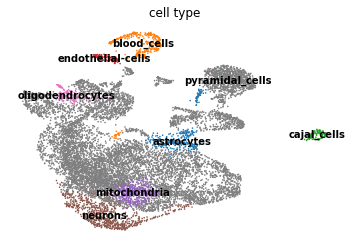

In [66]:
#sc.pl.tsne(cluster, color=['Snca', 'Cox4i2','Apoe','Cdh5','Gria1','Hbb-bs','Reln','Olig1'], layer=layer1)
cluster_annotation={'5':'neurons','8':'mitochondria','13':'astrocytes', '18':'endothelial-cells', '1':'pyramidal_cells', '14':'blood_cells', '20':'cajal_cells','17':'oligodendrocytes'}
cluster.obs['cell type'] = cluster.obs['clusters'].map(cluster_annotation).astype('category')
sc.pl.umap(cluster, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10)